# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Yene Irvine


### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
# Importing required library
from yellowbrick.datasets import load_concrete

# Loading the dataset
X, y = load_concrete()




### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn

2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?

3. Implement each machine learning model with `X` and `y`

In [7]:
# 1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?

# Instantiate Decision Tree with max_depth=5
decision_tree_model = DecisionTreeRegressor(max_depth=5)

# Instantiate Random Forest with max_depth=5
random_forest_model = RandomForestRegressor(max_depth=5, n_estimators=100)  

# Instantiate Gradient Boosting with max_depth=5
gradient_boosting_model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)

# 3. Implement each machine learning model with `X` and `y`
# Fitting the models
decision_tree_model.fit(X, y)
random_forest_model.fit(X, y)
gradient_boosting_model.fit(X, y)

GradientBoostingRegressor(max_depth=5)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [8]:
# Additional imports
from sklearn.model_selection import train_test_split, cross_val_score

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate models (assuming you've done this in Step 3)
dt_model = DecisionTreeRegressor(max_depth=5)
rf_model = RandomForestRegressor(max_depth=5, n_estimators=100)
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)

# Train models on training data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Calculate average MSE using cross-validation on training data for each model
dt_mse = -cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
rf_mse = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
gb_mse = -cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# Print results
print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)


Decision Tree MSE: 73.92986392437432
Random Forest MSE: 47.234766549327965
Gradient Boosting MSE: 23.554267550840727


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# We already have the training MSEs. Let's get the validation MSEs.
dt_val_mse = -cross_val_score(dt_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()
rf_val_mse = -cross_val_score(rf_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()
gb_val_mse = -cross_val_score(gb_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()

# Using a dictionary to efficiently gather results
model_results = {
    'DT': {'Training Accuracy': dt_mse, 'Validation Accuracy': dt_val_mse},
    'RF': {'Training Accuracy': rf_mse, 'Validation Accuracy': rf_val_mse},
    'GB': {'Training Accuracy': gb_mse, 'Validation Accuracy': gb_val_mse}
}

# Convert dictionary to DataFrame
results = pd.DataFrame(model_results).T  # Transpose to get models as index

# Print results
print(results)


    Training Accuracy  Validation Accuracy
DT          73.929864           104.561851
RF          47.234767            63.141885
GB          23.554268            56.589484


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [10]:
# TO DO: ADD YOUR CODE HERE
from sklearn.model_selection import cross_val_score

# Calculate R^2 for training data
dt_r2_train = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2').mean()
rf_r2_train = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2').mean()
gb_r2_train = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()

# Calculate R^2 for validation data
dt_r2_val = cross_val_score(dt_model, X_test, y_test, cv=5, scoring='r2').mean()
rf_r2_val = cross_val_score(rf_model, X_test, y_test, cv=5, scoring='r2').mean()
gb_r2_val = cross_val_score(gb_model, X_test, y_test, cv=5, scoring='r2').mean()

# Using a dictionary to efficiently gather results
r2_results = {
    'DT': {'Training R2': dt_r2_train, 'Validation R2': dt_r2_val},
    'RF': {'Training R2': rf_r2_train, 'Validation R2': rf_r2_val},
    'GB': {'Training R2': gb_r2_train, 'Validation R2': gb_r2_val}
}

# Convert dictionary to DataFrame
results_r2 = pd.DataFrame(r2_results).T  # Transpose to get models as index

# Print R^2 results
print(results_r2)


    Training R2  Validation R2
DT     0.736280       0.575590
RF     0.828980       0.754671
GB     0.916258       0.782746


### Questions (6 marks)

1. How do these results compare to the results using a linear model in the previous assignment? Use values.


MSE:

Linear(previous assignment): Training MSE was 110.3 and Validation MSE was 95.65.
DT: For Training, the MSE is 73.93, but it increases to 104.56 for Validation.
RF: The Training MSE drops to 46.23 and continues to drop for Validation with 63.14.
GB: The Training MSE reaches its lowest at 23.5542, and for Validation, it's 56.58.
All the tree models have achieved a better fit on the training set than the linear model, as seen from the decreased training MSEs. On the validation side, RF and GB have outperformed the linear model, while DT struggled a bit.

R2 Score:

Linear (previous assignment): The Training and Validation R2 were 0.609 and 0.637 respectively.
DT: Achieved a Training R2 of 0.736, but slipped to 0.576 on Validation.
RF: Improved Training with an R2 of 0.829 and did well on Validation with 0.755.
GB: Tops the list with Training R2 at 0.916 and Validation R2 at 0.783.
Every tree model has bettered the training R^2 compared to the linear model. For validation, RF and GB models have gone past the linear model, but DT has taken a step back.


2. Out of the models you tested, which model would you select for this dataset and why?
Considering both our metrics, the Gradient Boosting (GB) model appears to be the best. It's demonstrating the best balance between understanding the training data and predicting  unseen data, as indicated by the highest R^2 and the lowest MSE values, especially on the training set.


3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

To improve results, we could experiment with model settings/tuning parameters. Using techniques like GridSearchCV or RandomizedSearchCV, we could try different parameter combinations like n_estimators, max_depth, and so on.

We could also dive deeper into our data and perhaps come up with new features, or adjust existing ones, to boost our model's understanding. This may involve tasks like standardizing data values, which can be especially beneficial for Gradient Boosting models.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?
I referred to examples from the labs and previous lectures as well as the odd Google, referring the website https://www.geeksforgeeks.org/ at times.

2. In what order did you complete the steps?
I completed the steps chronologically through the Jupyter notebook.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I used ChatGPT to debug at times when I encountered errors. It turned out I just had some syntax issues. 

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Honestly, not really. I cited the examples and use geeksforgeeks.org and that helped keep this relatively straightfroward. 

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [11]:
# TO DO: Import wine dataset
import pandas as pd

# Defining the column headers as they are not provided in the dataset
column_headers = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine_data = pd.read_csv(url, header=None, names=column_headers)

# Splitting the dataset into feature matrix 'X' and target vector 'y'
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]

# Printing the size and type of 'X' and 'y'
print(f"Size of X: {X.shape}")
print(f"Type of X: {type(X)}")
print(f"\nSize of y: {y.shape}")
print(f"Type of y: {type(y)}")


Size of X: (178, 13)
Type of X: <class 'pandas.core.frame.DataFrame'>

Size of y: (178,)
Type of y: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [17]:
# TO DO: ADD YOUR CODE HERE
# Printing the first five rows of the dataset
print(wine_data.head())


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [18]:
# TO DO: ADD YOUR CODE HERE
# Checking for missing values in each column
missing_values = wine_data.isnull().sum()
print(missing_values)


Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [19]:
# TO DO: ADD YOUR CODE HERE
# Count the number of samples for each wine type
wine_counts = y.value_counts()
print(wine_counts)


Class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [28]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Step 3

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

svc_model.fit(X, y)
dt_model.fit(X, y)

# Step 4
# Import necessary libraries for validation
from sklearn.model_selection import cross_validate

# List of models
models = {
    "SVC": svc_model,
    "DecisionTree": dt_model
}

# Dictionary to store training and validation accuracies for each model
accuracy_data = {}

# Validate each model
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    accuracy_data[name] = {
        "Training accuracy": scores['train_score'].mean(),
        "Validation accuracy": scores['test_score'].mean()
    }

    
#Step 5

# Convert accuracy_data dictionary to pandas DataFrame
results = pd.DataFrame(accuracy_data).T  # The 'T' is for transpose, to have the model names as rows.

# Print the results DataFrame
print(results)


              Training accuracy  Validation accuracy
SVC                    0.703743             0.663492
DecisionTree           0.976165             0.882063


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [35]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the DecisionTree model using the training set
best_model = DecisionTreeClassifier(max_depth=3, random_state=0)
best_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_model.predict(X_test)


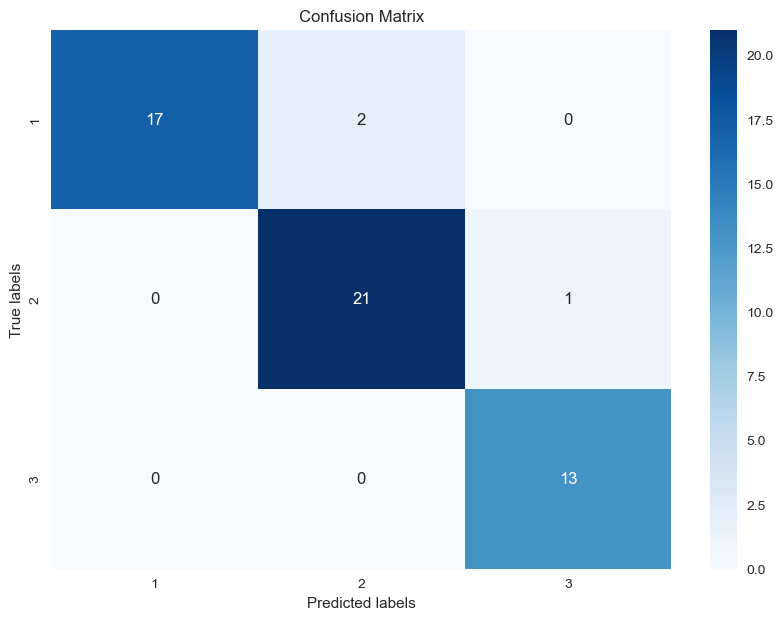

In [41]:
# TO DO: Print confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

# Print classification report
# Convert unique class numbers to strings
target_names = [str(label) for label in y.unique()]
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
The DecisionTree classifier appears to be a better model for this dataset based on both training and validation accuracy, scoring 0.976 and 0.882 respectively, compared to 0.704 training accuracy and 0.663 validation accuracy for SVC.  

The discrepancy between the training and validation accuracies for the DecisionTree model seems to suggest potential overfitting. This discrepancy is not so significant for SVC.

2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
Data Complexity: Decision trees are good at handling non-linear patterns and feature interactions, which may be present in the wine data. 

Feature Scaling: SVMs are sensitive to data scale, needing standardized features to work well. Decision trees are not sensitive to scaling. 

3. How many samples were incorrectly classified in step 5.2? 
3

4. In this case, is maximizing precision or recall more important? Why?
Precision is the ratio of true positive predictions to total predicted positives, which is important when the cost of false positives is high. On the other hand, recall determines the ratio of true positive predictions to all actual positives, making it essential when overlooking positive samples could lead to considerable consequences.  In this context, recall measures how many of the actual positive samples were correctly identified, so for the wine dataset, precision must be maximized.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
Just like in Part 1, I referred to previous Labs and Lecture notes.

1. In what order did you complete the steps?
I completed them all chronologically through this notebook.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I used ChatGPT to diagnose errors I kept encountering during Step 5 when trying to print the classification report and generate the confusion matrix.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
No, only really the above ones where I kept encountering errors.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
As discussed in lectures, models with high training accuracy and significantly lower validation/test accuracy can be indicative of high variance / overfitting. In contrast, models that underperform both in training and validation might be in a high bias scenario, which is characterized as underfitting. In these results, the Decision Tree seems to lean more towards the high variance side (overfitting), whereas the SVC might be underfitting.

Another observation with the wine dataset is that the macro average and weighted average values of precision, recall, and F1-score are all in the mid-90s, reiterating that the model's performance is consistent across the classes. Class 1 specifically had an impressive precision of 100%.


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

It was satisfying to get a visual representation in the form of a confusion matrix at the end. There were challenging moments throughout the assignment, specifically in trying to get the syntax exactly right to prevent errors, but everything was relatively straightforward especially using the previous labs and lectures as a reference. At the end of the day, the content is relatively intuitive.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [1]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*